In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [19]:
# links 

file_id10 = '1GlXcIkS3K3hvP6dFsVZMun4pMTuBJnqb' 
url10 = f'https://drive.google.com/uc?export=download&id={file_id10}'

file_id11 = '1AMZRm7jFOCtGrcHKSDU67rS9V2DZUE4t' 
url11 = f'https://drive.google.com/uc?export=download&id={file_id11}'

file_id12 = '1kqY4RaUPNwZMFYlewF5k_M9131WdKcE-' 
url12 = f'https://drive.google.com/uc?export=download&id={file_id12}'

file_id13 = '1P9LnCmvX15LfHbdQ1rZQ_6V19eRobBr7' 
url13 = f'https://drive.google.com/uc?export=download&id={file_id13}'

file_id14 = '18uaJARuPpA3p308l2NcZm55saLURIpTO' 
url14 = f'https://drive.google.com/uc?export=download&id={file_id14}'

file_id15 = '1RHPGVVmG2qRekAwysHvmnJvAXn0qmH5J' 
url15 = f'https://drive.google.com/uc?export=download&id={file_id15}'

file_id16 = '1LVwvD3GrUF6qFAKW4w9RnsrIDMJ9soNq' 
url16 = f'https://drive.google.com/uc?export=download&id={file_id16}'

file_id17 = '1h0b_jzFAMbjgQzQ9s1reZGgbXTThPcPr' 
url17 = f'https://drive.google.com/uc?export=download&id={file_id17}'

file_id18 = '14goWMFuD76M5P-SavPIxI8B_WiXgrnd9' 
url18 = f'https://drive.google.com/uc?export=download&id={file_id18}'

file_id19 = '1ArTa_67aIf5w0wC6tZ5PVq7lJAMXYZX2'
url19 = f'https://drive.google.com/uc?export=download&id={file_id19}'

file_id20 = '1ey7pDu2uTkfn0Jr0fhBJwACk_uP1lXd2' 
url20 = f'https://drive.google.com/uc?export=download&id={file_id20}'


In [20]:
#importando todas as bases( dos últimos 10 anos disponiíveis)
df10 = pd.read_csv (url10,sep=';', encoding='ISO-8859-1')
df11 = pd.read_csv (url11,sep=';', encoding='ISO-8859-1')
df12 = pd.read_csv (url12,sep=';', encoding='ISO-8859-1')
df13 = pd.read_csv (url13,sep=';', encoding='ISO-8859-1')
df14 = pd.read_csv (url14,sep=';', encoding='ISO-8859-1')
df15 = pd.read_csv (url15,sep=';', encoding='ISO-8859-1')
df16 = pd.read_csv (url16,sep=';', encoding='ISO-8859-1')
df17 = pd.read_csv (url17,sep=';', encoding='UTF-8') 
df18 = pd.read_csv (url18,sep=';', encoding='UTF-8')
df19 = pd.read_csv (url19,sep=';', encoding='UTF-8')
df20 = pd.read_csv (url20,sep=';', encoding='ISO-8859-1')


In [21]:
lista_dfs = [df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20]

df= pd.concat(lista_dfs, ignore_index=True)
df['ANO_CONCESSAO_BOLSA'] = df['ANO_CONCESSAO_BOLSA'].astype('Int64')



In [22]:
#Tratando a base os nomes das colunas estão divergentes

df['Sexo'] = df['SEXO_BENEFICIARIO'].combine_first(df['SEXO_BENEFICIARIO_BOLSA'])
df['Raca'] = df['RACA_BENEFICIARIO'].combine_first(df['RACA_BENEFICIARIO_BOLSA'])
df['UF'] = df['UF_BENEFICIARIO'].combine_first(df['SIGLA_UF_BENEFICIARIO_BOLSA'])
df['Municipio'] = df['MUNICIPIO_BENEFICIARIO'].combine_first(df['MUNICIPIO_BENEFICIARIO_BOLSA'])
df['Municipio'] = df['Municipio'].combine_first(df['MUNICIPIO'])
df['Regiao'] = df['REGIAO_BENEFICIARIO'].combine_first(df['REGIAO_BENEFICIARIO_BOLSA'])

# Eliminando as colunas duplicadas antigas e obsoletas
df.drop(columns=[
    'CPF_BENEFICIARIO', 'CPF_BENEFICIARIO_BOLSA',
    'DATA_NASCIMENTO', 'DT_NASCIMENTO_BENEFICIARIO',
    'SEXO_BENEFICIARIO', 'SEXO_BENEFICIARIO_BOLSA',
    'RACA_BENEFICIARIO', 'RACA_BENEFICIARIO_BOLSA',
    'UF_BENEFICIARIO', 'SIGLA_UF_BENEFICIARIO_BOLSA',
    'MUNICIPIO', 'MUNICIPIO_BENEFICIARIO','MUNICIPIO_BENEFICIARIO_BOLSA',
    'REGIAO_BENEFICIARIO', 'REGIAO_BENEFICIARIO_BOLSA'
], inplace=True)


print(df.columns)

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'CAMPUS',
       'Sexo', 'Raca', 'UF', 'Municipio', 'Regiao'],
      dtype='object')


In [23]:
df = df.rename(columns={
    # Padronização de ano
    'ANO_CONCESSAO_BOLSA': 'Ano',

    # IES
    'CODIGO_EMEC_IES_BOLSA': 'Codigo_IES',
    'NOME_IES_BOLSA': 'Nome_IES',
    
    # Curso
    'CAMPUS': 'Campus',
    'TIPO_BOLSA': 'Tipo_Bolsa',
    'MODALIDADE_ENSINO_BOLSA': 'Modalidade',
    'NOME_CURSO_BOLSA': 'Curso',
    'NOME_TURNO_CURSO_BOLSA': 'Turno',

    # Beneficiário
    'BENEFICIARIO_DEFICIENTE_FISICO': 'Deficiencia'
})

df['Tipo_Bolsa'] = df['Tipo_Bolsa'].replace({
    'BOLSA INTEGRAL': 'INTEGRAL',
    'INTEGRAL': 'INTEGRAL',
    'BOLSA PARCIAL 50%': 'PARCIAL',
    'PARCIAL': 'PARCIAL'
})
df['Modalidade'] = df['Modalidade'].replace({
    'EDUCAÇÃO A DISTÂNCIA': 'EAD',
    'PRESENCIAL': 'Presencial',

})


In [24]:
#Criei uma coluna auxiliar pra me ajudar a fazer os agrupamentos
df['Cont'] = 1

In [25]:
# Padronizando o texto
df['Curso'] = df['Curso'].str.title().str.strip()


<function matplotlib.pyplot.show(close=None, block=None)>

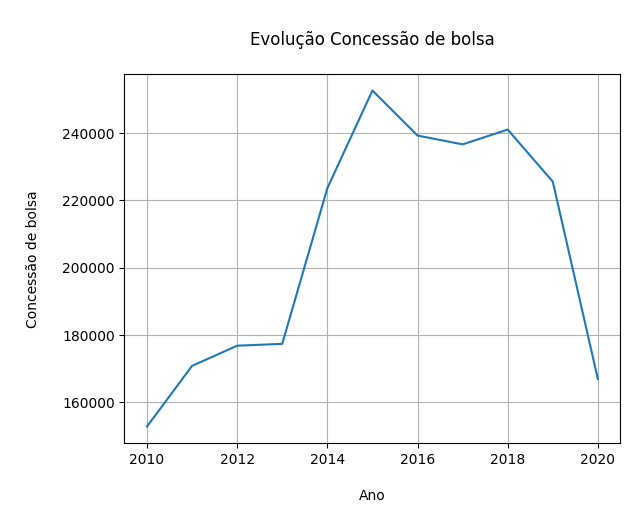

In [26]:
# Evolução do numero de bolsa________________________________________________
df_bolsa = df.groupby('Ano')['Cont'].sum().reset_index()

#gráfico
plt.plot(df_bolsa['Ano'],df_bolsa['Cont'])
plt.title('\nEvolução Concessão de bolsa\n')
plt.xlabel('\nAno\n')
plt.ylabel('\nConcessão de bolsa\n')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

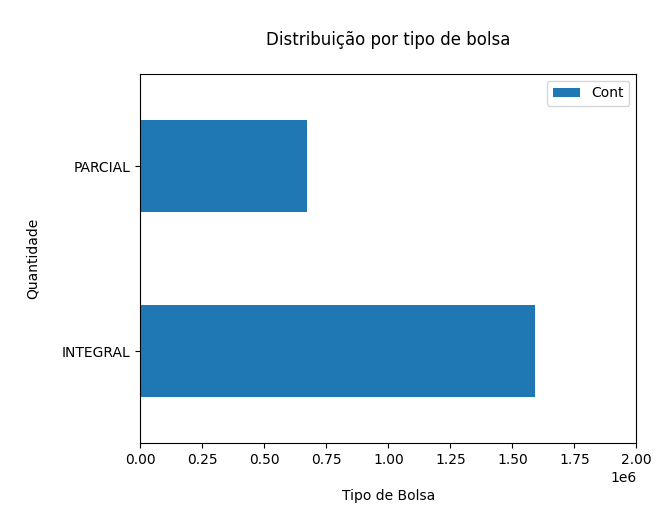

In [27]:
# Distribuição por tipo de bolsa_____________________________________________
df_tipo_bolsa= df.groupby('Tipo_Bolsa')['Cont'].sum().reset_index()
df_tipo_bolsa

#grafico
df_tipo_bolsa.plot(kind= 'barh', x = 'Tipo_Bolsa', y= 'Cont')
plt.title('\nDistribuição por tipo de bolsa\n')
plt.xlabel('\nTipo de Bolsa\n')
plt.ylabel('\nQuantidade\n')
plt.xlim(0, 2000000) 
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

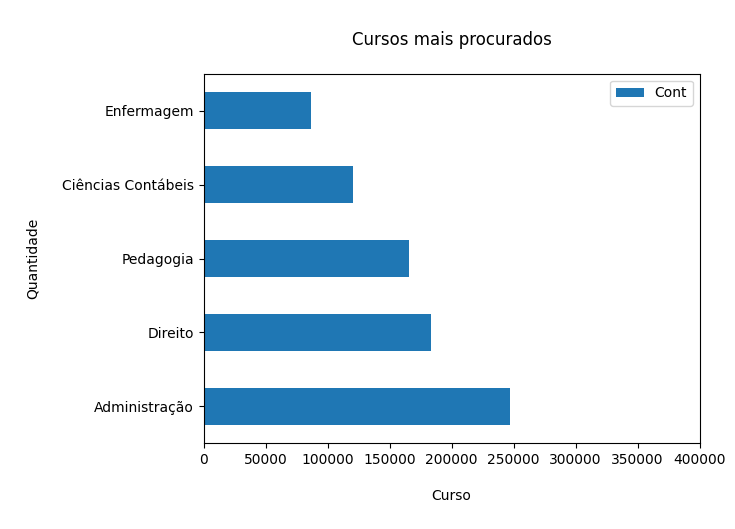

In [28]:
# Cursos Mais procurados_____________________________________________________ 
df_curso = df.groupby('Curso')['Cont'].sum().reset_index()
df_curso = df_curso.sort_values(by='Cont', ascending=False).head(5)

df_curso.plot(kind= 'barh', x = 'Curso', y= 'Cont')
plt.title('\nCursos mais procurados\n')
plt.xlabel('\nCurso\n')
plt.ylabel('\nQuantidade\n')
plt.xlim(0, 400000) 
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

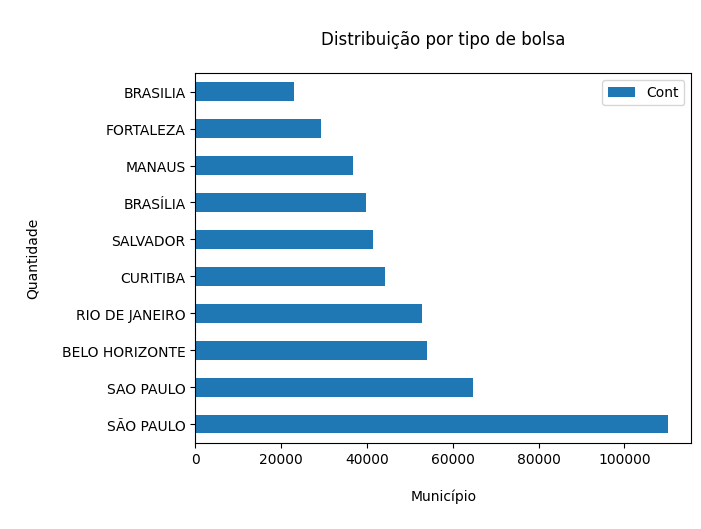

In [29]:
# Distribuiçnao por municipio________________________________________________            
df_muni = df.groupby('Municipio')['Cont'].sum().reset_index()
df_muni = df_muni.sort_values(by='Cont', ascending=False).head(10)

df_muni.plot(kind= 'barh', x = 'Municipio', y= 'Cont')
plt.title('\nDistribuição por tipo de bolsa\n')
plt.xlabel('\nMunicípio\n')
plt.ylabel('\nQuantidade\n')
plt.show



In [30]:
df

,Ano,Codigo_IES,Nome_IES,Tipo_Bolsa,Modalidade,Curso,Turno,Deficiencia,Campus,Sexo,Raca,UF,Municipio,Regiao,Cont
0,2010,20.0,UNIVERSIDADE DE PASSO FUNDO,PARCIAL,Presencial,Administração,Noturno,NÃO,NaN,Masculino,Branca,RS,PALMEIRA DAS MISSÕES,SUL,1
1,2010,20.0,UNIVERSIDADE DE PASSO FUNDO,PARCIAL,Presencial,Administração,Noturno,NÃO,NaN,Feminino,Branca,RS,PALMEIRA DAS MISSÕES,SUL,1
2,2010,20.0,UNIVERSIDADE DE PASSO FUNDO,PARCIAL,Presencial,Administração,Noturno,NÃO,NaN,Masculino,Branca,RS,PALMEIRA DAS MISSÕES,SUL,1
3,2010,20.0,UNIVERSIDADE DE PASSO FUNDO,INTEGRAL,Presencial,Administração,Noturno,NÃO,NaN,Masculino,Branca,RS,PALMEIRA DAS MISSÕES,SUL,1
4,2010,423.0,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,INTEGRAL,Presencial,Direito,Noturno,NÃO,NaN,Feminino,Branca,RS,ERECHIM,SUL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278624,2020,1491.0,CENTRO UNIVERSITÁRIO INTERNACIONAL,PARCIAL,EAD,Administração,CURSO A DISTÂNCIA,N,PAP CABO FRIO,F,Parda,RJ,SAO PEDRO DA ALDEIA,SUDESTE,1
2278625,2020,1491.0,CENTRO UNIVERSITÁRIO INTERNACIONAL,PARCIAL,EAD,Relações Internacionais,CURSO A DISTÂNCIA,N,PAP CABO FRIO,F,Parda,RJ,ARARUAMA,SUDESTE,1
2278626,2020,1491.0,CENTRO UNIVERSITÁRIO INTERNACIONAL,PARCIAL,EAD,Administração,CURSO A DISTÂNCIA,N,PAP CANOAS,M,Branca,RS,CANOAS,SUL,1
2278627,2020,1491.0,CENTRO UNIVERSITÁRIO INTERNACIONAL,PARCIAL,EAD,Relações Internacionais,CURSO A DISTÂNCIA,N,PAP ANANINDEUA,F,Parda,PA,ANANINDEUA,NORTE,1


<function matplotlib.pyplot.show(close=None, block=None)>

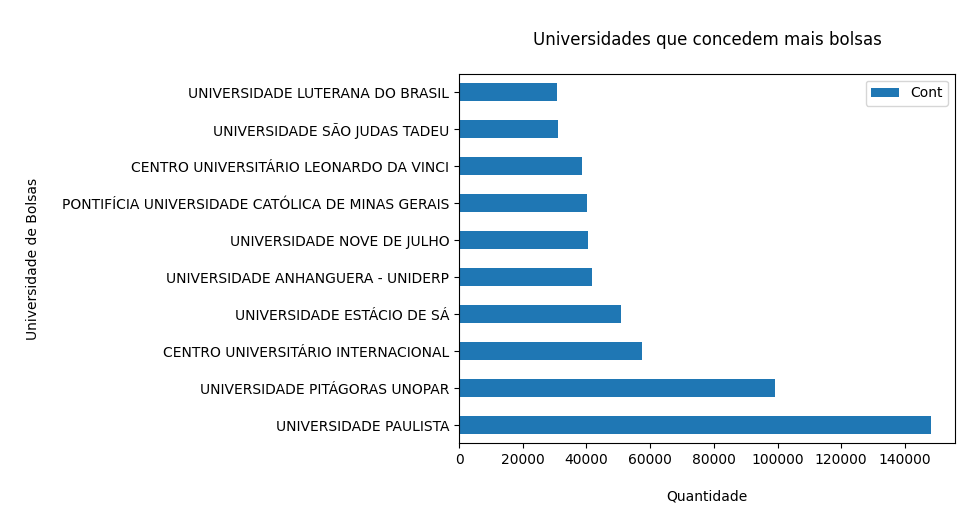

In [31]:
# Universidades que compoem as 25% com mais bolsas ____________________________
df_uni= df.groupby('Nome_IES')['Cont'].sum().reset_index()
dados_uni= np.array(df_uni['Cont'])
q3= np.percentile(dados_uni,75)

maior_uni_25= df_uni.loc[df_uni['Cont'] >= q3]
maior_uni_25= maior_uni_25.sort_values('Cont', ascending=False).head(10)

# gráfico 
maior_uni_25.plot(kind= 'barh', x = 'Nome_IES', y= 'Cont')
plt.title('\nUniversidades que concedem mais bolsas\n')
plt.xlabel('\nQuantidade\n')
plt.ylabel('\nUniversidade de Bolsas\n')
plt.show



In [39]:
df_modalidade = df.groupby(['Ano', 'Modalidade']).size().reset_index(name='Cont')
df_modalidade

,Ano,Modalidade,Cont
0,2010,EAD,21267
1,2010,Presencial,131466
2,2011,EAD,25127
3,2011,Presencial,145639
4,2012,EAD,32665
5,2012,Presencial,144099
6,2013,EAD,40625
7,2013,Presencial,136701
8,2014,EAD,46062
9,2014,Presencial,177536


In [40]:
df_total_ano = df_modalidade.groupby('Ano')['Cont'].transform('sum')
df_total_ano

0     152733
1     152733
2     170766
3     170766
4     176764
5     176764
6     177326
7     177326
8     223598
9     223598
10    252650
11    252650
12    239262
13    239262
14    236636
15    236636
16    241032
17    241032
18    225555
19    225555
20    166830
21    166830
Name: Cont, dtype: int64

In [43]:
df_modalidade['Porcentagem'] = (df_modalidade['Cont'] / df_total_ano) * 100
df_modalidade['Porcentagem'] = df_modalidade['Porcentagem'].round(2)
df_modalidade

,Ano,Modalidade,Cont,Porcentagem
0,2010,EAD,21267,13.92
1,2010,Presencial,131466,86.08
2,2011,EAD,25127,14.71
3,2011,Presencial,145639,85.29
4,2012,EAD,32665,18.48
5,2012,Presencial,144099,81.52
6,2013,EAD,40625,22.91
7,2013,Presencial,136701,77.09
8,2014,EAD,46062,20.60
9,2014,Presencial,177536,79.40


In [46]:
# evolução da Porcentagem de Bolsas EAD 

df_ead = df_modalidade[df_modalidade['Modalidade'] == 'EAD']
df_ead = df_ead.sort_values(by='Ano')

#gráfico
plt.plot(df_ead['Ano'],df_ead['Porcentagem'])
plt.title('\nEvolução da Porcentagem de Bolsas EAD \n')
plt.xlabel('\nAno\n')
plt.ylabel('\nPorcentagem\n')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

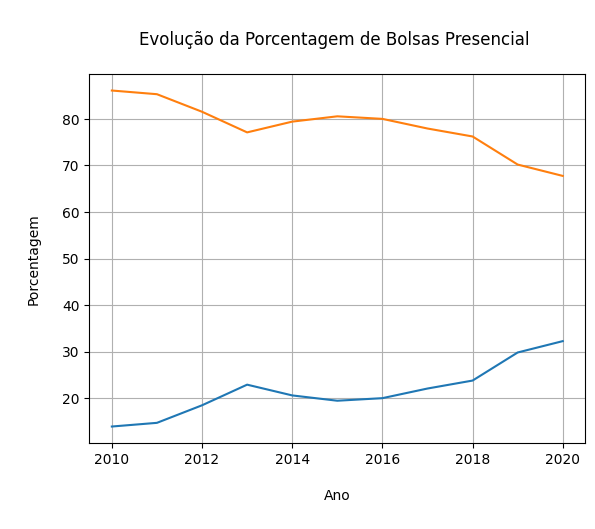

In [47]:
# evolução da Porcentagem de Bolsas Presenciais

df_presencial = df_modalidade[df_modalidade['Modalidade'] == 'Presencial']
df_presencial = df_presencial.sort_values(by='Ano')

#gráfico
plt.plot(df_presencial['Ano'],df_presencial['Porcentagem'])
plt.title('\nEvolução da Porcentagem de Bolsas Presencial \n')
plt.xlabel('\nAno\n')
plt.ylabel('\nPorcentagem\n')
plt.grid(True)
plt.show